## **1η Εργαστηριακή Άσκηση**

### **Μέρος 1 (UCI Dataset)**

#### **Αριθμός Ομάδας:** 88

#### Αλεξανδρόπουλος Σταμάτης (03117060)

####  Γκότση Πολυτίμη-Άννα ( 03117201)

#### Ζάρα Στέλλα (03117154)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Αρχικά κάνουμε upgrade στις βιβλοθήκες που θα χρειαστούμε.

In [ ]:
#  !pip install --upgrade pip  &> /dev/null#upgrade pip package installer
#  !pip install scikit-learn --upgrade  &> /dev/null#upgrade scikit-learn package
#  !pip install numpy --upgrade  &> /dev/null#upgrade numpy package
#  !pip install pandas --upgrade  &> /dev/null#--upgrade #upgrade pandas package
#  !pip install texttable &> /dev/null
#  !pip install -U imbalanced-learn

In [ ]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict,KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MultiLabelBinarizer
from imblearn.pipeline import Pipeline
import seaborn as sns
from texttable import Texttable
import time


# Μέρος 1ο: UCI dataset


## Εισαγωγή και επισκόπηση

#### Πληροφορίες για το EEG Eye State Data Set

Το παρόν data set δημιουργήθηκε από μια συνεχή EEG μέτρηση που έγινε με το  Emotiv EEG Neuroheadset. Η διάρκεια της μέτρησης ήταν  117 δευτερόλεπτα. Η κατάσταση των ματιών ανιχνεύθηκε μέσω κάμερας κατά τη διάρκεια της μέτρησης EEG και προστέθηκε αργότερα χειροκίνητα στο αρχείο μετά την ανάλυση των καρέ βίντεο. Παρακάτω φαίνονται μερικά χαρακτηριστικά του data set:

![](https://drive.google.com/uc?export=view&id=1yiOGj3VXKCBma4kM1VJleUtkaR13ddsd)

Βλέπουμε πως το data set αυτό αφορά το τομέα της ζωής, έγινε δωρεα στις 06/10/2013, και έχει χρησιμοποιηθεί 144850 φορές.

Ο αριθμός των δειγμάτων είναι 14980 και κάθε δείγμα περιγράφεται απο 14 συνεχή χαρακτηριστικά και την κλάση στην οποία ανήκει το εν λόγω δείγμα :

* b'0': υποδηλώνει ότι το μάτι είναι ανοιχτό

* b'1': υποδηλώνει ότι το μάτι είνια κλειστό

Τα χαρακτηριστικά είναι τύπου Integer, Real, ενώ τα labels τύπου < bytes>

Επιπλέον, αναφέρεται ότι απουσιαζουσες τιμές δεν υπάρχουν, καθώς και πως το dataset χρησιμοποιείται για προβλήματα classification.

##### Εισαγωγή Δεδομένων



Αρχικά εισάγουμε τα δεδομένα σε dataframes απευθείας από τα αρχεία που βρίσκονται αποθηκευμένα στο drive μας. Επισημαίνεται ότι δεν χρειάστηκε να κάνουμε μετατροπές στα αρχεία plain text για την εισαγωγή του.

In [ ]:
data = arff.loadarff('/content/drive/MyDrive/Colab Notebooks/NeuralNetworks/EEG Eye State.arff')
df = pd.DataFrame(data[0])
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,b'1'
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,b'1'
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,b'1'
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,b'1'


Παρακάτω αλλάζουμε την τελευταιας στηλής απο type < bytes > σε type < int > για μεγαλύτερη ευχέρεια στους υπολογισμούς στα παρακάτω ερωτήματα.

In [ ]:
df['eyeDetection'].replace( {b'1' :1 ,  b'0' :0 }, inplace=True)
print(df)

           AF3       F7       F3  ...       F8      AF4  eyeDetection
0      4329.23  4009.23  4289.23  ...  4635.90  4393.85             0
1      4324.62  4004.62  4293.85  ...  4632.82  4384.10             0
2      4327.69  4006.67  4295.38  ...  4628.72  4389.23             0
3      4328.72  4011.79  4296.41  ...  4632.31  4396.41             0
4      4326.15  4011.79  4292.31  ...  4632.82  4398.46             0
...        ...      ...      ...  ...      ...      ...           ...
14975  4281.03  3990.26  4245.64  ...  4593.33  4340.51             1
14976  4276.92  3991.79  4245.13  ...  4590.26  4333.33             1
14977  4277.44  3990.77  4246.67  ...  4591.79  4339.49             1
14978  4284.62  3991.79  4251.28  ...  4596.41  4350.77             1
14979  4287.69  3997.44  4260.00  ...  4597.95  4350.77             1

[14980 rows x 15 columns]


#### Πλήθος δειγμάτων και χαρακτηριστικών, και είδος όλων των χαρακτηριστικών


Παρατηρούμε ότι τα δεδομένα μας είναι χωρισμένα σε στήλες, πράγμα που κάνει πιο κατανοητή η αναπαράσταση του διανύσματος. Υπάρχουν επικεφαλίδες για κάθε feature και αρίθμηση γραμμών. Παρατηρούμε ότι έχουμε 14890 δείγματα και οι στήλες περιέχουν 14 EEG τιμές ( features)  και μια ακόμα τιμή (τελευταία στήλη) που καθορίζει την κατάσταση του ματιού. Η κατάσταση του ματιού μπορεί να είναι  b'0' (ή 0 μετα την μετατροπή που κάναμε)   που υποδηλώνει ότι το μάτι είναι ανοιχτό ή b'1' ( ή 1 μετά την μετατροπή που κάναμε)  που υποδηλώνει ότι το μάτι είναι κλειστό. Παρατηρούμε ότι το προηγούμετο dataframe έχει όλα τα features σε float τιμές και τα ονόματα των κλάσεων σε int τιμές μετά την μετατροπή.
Όσον αφορά την ύπαρξη μη διατεταγμένων χαρακτηριστικών, το μόνο χαρακτηριστικό που είναι μη διατεταγμένο είναι το χαρακτηριστικό eyeDetection το οποίο αφορά την κατάσταση του ματιού (ανοιχτή-κλειστή).

#### Επικεφαλίδες

Όπως παρατηρούμε παραπάνω, το dataset έχει και επικεφαλίδες και αρίθμηση γραμμών ( 14980 γραμμές). Παρακάτω φαίνονται τα ονόματα των στηλών:

In [ ]:
features = list(df.columns.values)
print(features)

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'eyeDetection']


#### Ετικέτες των κλάσεων



Οι ετικέτες της κλάση στην οποία ανήκει το κάθε δείγμα είναι:

* b'0': υποδηλώνει ότι το μάτι είναι ανοιχτό

* b'1': υποδηλώνει ότι το μάτι είνια κλειστό

Αυτές βρίσκονται στην 15η κολόνα και είναι οι εξής:

In [ ]:
y_df=pd.DataFrame(df['eyeDetection'])
y_df

,eyeDetection
0,0
1,0
2,0
3,0
4,0
...,...
14975,1
14976,1
14977,1
14978,1


#### Απουσιάζουσες τιμές

In [ ]:
df.isna().any().any()

False

Από τo παραπάνω output παρατηρούμε ότι δεν υπάρχουν απουσιάζουν τιμές, όπως και αναφέρεται άλλωστε και στις πληροφορίες του data set.

#### Πλήθος Κλάσεων και και ποσοστά δειγμάτων τους επί του συνόλου

In [ ]:
print(df["eyeDetection"].value_counts())
eye_open, eye_closed = df["eyeDetection"].value_counts()
print("Percentage of data labeled as eye-open: {:.3f}".format(100*eye_open/14980))
print("Percentage of data labeled as eye-closed: {:.3f}".format(100*eye_closed/14980))

0    8257
1    6723
Name: eyeDetection, dtype: int64
Percentage of data labeled as eye-open: 55.120
Percentage of data labeled as eye-closed: 44.880


Από τα παραπάνω παρατηρούμε ότι έχουμε ένα binary dataset, αφού ο αριθμός των κλάσεων είναι 2, όπως αναφέραμε προηγουμένως. Ο αριθμος των δειγμάτων όπου το μάτι είναι ανοιχτό  είναι 8257 ενώ κλειστό είναι 6723. Το αντίστοιχο ποσοστό είναι  55.120% για eye-open και  44.880% για eye-closed. Θεωρώντας ως μη ισορροπημένο ένα dataset στο οποίο η μια κλάση είναι 1.5 φορά πιο συχνή από την άλλη (δηλαδή 60-40 αναλογία) προκύπτει ότι το εν λόγω data set είναι σχετικά ισορροπημένο. Παρακάτω οπτικοποιούμε τον αριθμό των δειγμάτων ανά κλάση.

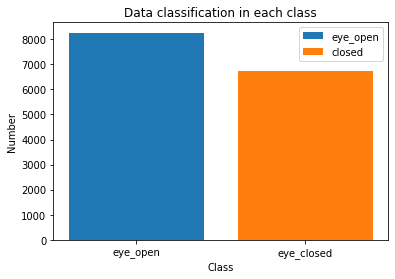

In [ ]:
classes = [eye_open, eye_closed]
fig = plt.figure()
x1 = ['eye_open']
x2= ['eye_closed']
plt.bar(x1, classes[0],label='eye_open')
plt.bar(x2, classes[1],label='closed')
plt.title('Data classification in each class')
plt.xlabel('Class')
plt.ylabel('Number')
plt.legend()
plt.show()

Παρακάτω οπτικοποιούμε το ποσοστό των δειγμάτων που αντιστοιχούν σε κάθε μία κλάση.

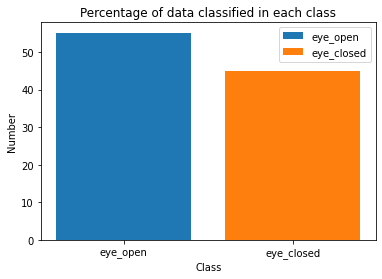

In [ ]:
classes = [100*eye_open/14980, 100*eye_closed/14980]

fig = plt.figure()
x1 = ['eye_open']
x2= ['eye_closed']
plt.bar(x1,classes[0],label='eye_open')
plt.bar(x2,classes[1],label='eye_closed')
plt.title('Percentage of data classified in each class')
plt.xlabel('Class')
plt.ylabel('Number')
plt.legend()
plt.show()

####Στατιστική ανάλυση των δεδομένων

Παρακάτω παρατηρούμε τα 14980 δείγματα του data με τις αντίστοιχες τιμές των features που έχει το καθένα, χωρίς όμως την κλάση στην οποία ανήκουν.

In [ ]:
x_data=pd.DataFrame(df.loc[:, df.columns != 'eyeDetection']) # all columns except "eyeDetection"
x_data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77


Από τη στιγμή που έχουμε αφαιρέσει απο τα δεδομένα την κλάση στην οποία ανήκουν, κάνουμε στατιστική ανάλυση των features μέσω της describe() μεθόδου

In [ ]:
x_data.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


Παρατηρούμε ότι όλα τα features έχουν σημαντικές μη μηδενικές τιμές διασποράς και μέσης τιμής. Γενικά  η πολύ χαμηλή  διακύμανση ενός χαρακτηριστικού εισόδου  δεν συμβάλει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Ειδικά όταν η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό έχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν παρέχει καμία πληροφορία  στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηριστικών.
Γενικά η μεγάλη διαστατικότητα δυσκολεύει τους αλγορίθμους μηχανικής μάθησης, επομένως η απομάκρυνση κάποιας στήλης είναι αρκετά βοηθητική για το σύστημα. Παρόλα αυτά στην περιπτωσή μας δεν χρειάζεται να γίνει καμία τέτοια απομάκρυνση.



##Προετοιμασία

#### Διαχωρισμός δεδομένων σε train και test

Στην συνέχεια μετατρέπουμε τα δεδομένα σε μορφή συμβατή ως προς την scikit learn δηλαδή σε τύπο: <class 'numpy.ndarray'>

In [ ]:
X = x_data.values
y = y_df.values.ravel()

Έπειτα διαχωρίζουμε training και testing δεδομένα σε ποσοστό 70%-30%, όπως μας ζητείται, άρα έχουμε 10486 δείγματα στο train set και 4494 στο test set.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print('Dimensions of train labels array:', y_train.shape)
print('Dimensions of train samples array:', X_train.shape)
print('Dimensions of test labels array:', y_test.shape)
print('Dimensions of test samples array:', X_test.shape)

Dimensions of train labels array: (10486,)
Dimensions of train samples array: (10486, 14)
Dimensions of test labels array: (4494,)
Dimensions of test samples array: (4494, 14)


####Απουσιάζουσες τιμές

Σημειώνουμε ότι, όπως αναφέραμε νωρίτερα, δεν υπάρχουν απουσιάζουσες τιμές στο dataset που διαθέτουμε.

####Κατηγορικά και μη διατεταγμένα χαρακτηριστικά

Στο dataset το μόνο χαρακτηριστικό το οποίο είναι κατηγορικό και μη διατεταγμένο είναι οι ετικέτες, δηλαδή το χαρακτηρηστικό με τίτλο στήλης "eyeDetection". Το χαρακτηρηστικό αυτό έχει δύο κατηγορίες, b'0' (ανοιχτό μάτι) και b'1' (κλειστό μάτι). Η διαχείριση που κάναμε σε αυτό ήταν η αντικατάσταση της μορφής 'b' με απλούς αριθμούς 0 και 1, καθώς και η εξαγωγή του χαρακτηρηστικού σε ξεχωριστό μονοδιάστατο πίνακα ετικετών (y).

## Ταξινόμηση

Στο μέρος αυτό εξετάζουμε τους εξής ταξινομητές:

* dummy
* Gaussian Naive Bayes (GNB)
* KNeirestNeighbors (kNN)
* Logistic Regression (LR)

και αξιολογούμε την απόδοση τους για τις εξής μετρικές:

* ορθότητα (accuracy)
* F1-score (weighted)

Όσον αφορά την επιλογή weighted F1-score, σημειώνουμε ότι επιλέξαμε αυτό το είδος F1-score, καθώς αυτό λαμβάνει υπ' όψιν την ύπαρξη imbalances στο πλήθος δεδομένων ανά κατηγορία. Στα παρόντα δεδομένα, όπως αναφέραμε νωρίτερα, αν και δεν έχουμε πολύ μεγάλη ανισορροπία, εξακολουθούμε να μην έχουμε 50-50 διαμοιρασμό, και άρα μία μικρή ανισορροπία είναι υπαρκτή, και επιθυμούμε να την λάβουμε υπ' όψιν.

Στο μέρος αυτό θα χρησιμοποιηθεί και η έννοια του **πίνακα σύγχυσης (confusion matrix)**. Ουσιαστικά  πρόκειται για έναν MxM πίνακα, όπου το (i,j) στοιχείο του ισούται με το πλήθος των σημείων που, ενώ προέρχονται από την κλάση i, καταχωρούνται στην κλάση j. O πίνακας αυτός παρέχει πληροφορίες σχετικά με το αν κάποιες κλάσεις έχουν τη τάση να συγχέονται με  άλλες κλάσεις.

Η παρακάτω συνάρτηση θα χρησιμοποιηθεί για τoν σχεδιασμό του confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()


Η παρακάτω συνάρτηση θα χρησιμοποιηθεί στη συνέχεια για τον υπολογισμό και την εκτύπωση των μετρικών αξιολόγησης των ταξινομητών. (Σημειώνουμε ότι υπολογίζουμε τις ζητούμενες μετρικές και τις τυπώνουμε κάνωντας 10-fold cross-validation).

In [ ]:
def classification_baseline_metrics(clf,X_train,X_test,y_train,y_test):

    f1_weighted = cross_val_score(clf,X_train,y_train,cv=10,scoring='f1_weighted')
    acc = cross_val_score(clf,X_train,y_train,cv=10,scoring='accuracy')
    print("10-fold corss validation accuracy of "+ str(clf) + " is :" ,acc)
    accuracy=np.mean(acc)
    print("Accuracy score is ", accuracy)
    f1_weighted= np.mean(f1_weighted)
    print("f1 weighted score =",f1_weighted)

    return clf,f1_weighted,accuracy

Στην παρακάτω συνάρτηση στην αρχή "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης μέσω της μεθόδου fit και με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (test set), κρατώντας τους αντίστοιχους χρόνους. Τέλος τυπώνουμε τον πίνακα σύγχυσης καλώντας κάθε φορά τη συνάρτηση plot_confusion_matrix.

In [ ]:
def classification_baseline(clf,X_train,X_test,y_train,y_test, plot_confusion=False, plot_seaborn=False):
    t1 = time.time()
    clf.fit(X_train,y_train)      # train the classifier
    t2 = time.time()
    y_pred = clf.predict(X_test)  # predict class for each sample in test set
    t3= time.time()

    if (plot_confusion):
      cf_matrix = confusion_matrix(y_pred,y_test)
      plot_confusion_matrix(cf_matrix, ['eye_open', 'eye_closed'],title='Confusion matrix')   # call function to plot confusion matrix
    fit_time=round(t2-t1,5)         # calculate time need to fit
    predict_time=round(t3-t2,5)     # calculate time needed to predict
    if (plot_seaborn):
      print('\n')
      ax = plt.axes()
      sns.heatmap(cf_matrix, annot=False)
      ax.set_title('Heatmap')

    return clf,fit_time,predict_time

###Επίδοση out of the box

#### Dummy Classifier

Αρχικά εξετάζουμε τους dummy classifiers με χρήση της κλάσης DummyClassifier, η οποία δέχεται μια παράμετρο που καθορίζει την τακτική της ταξινόμησης ως εξής:

  *  "uniform”: προβλέπει τυχαία και ομοιόμορφα
  *  “constant”: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης
  *  “most_frequent”: προβλέπει πάντα την πιο συχνή κατηγορία στο training set
  *  “prior”: προβλέπει πάντα την κατηγορία με την μεγαλύτερη prior πιθανότητα
  *  “stratified”: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set



##### Dummy Uniform

10-fold corss validation accuracy of DummyClassifier(strategy='uniform') is : [0.48427073 0.48808389 0.51954242 0.5128694  0.50047664 0.51191611
 0.49618321 0.49332061 0.47041985 0.49427481]
Accuracy score is  0.49713576725198116
f1 weighted score = 0.503326104523095


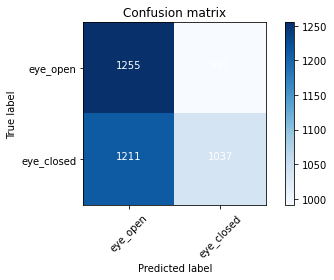

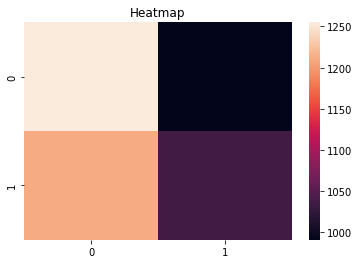

In [ ]:
clf_uniform = DummyClassifier(strategy="uniform")
uniform = classification_baseline_metrics(clf_uniform,X_train,X_test,y_train,y_test)
uniform_diagrams= classification_baseline(clf_uniform,X_train,X_test,y_train,y_test,True,True)

Παρατηρούμε ότι αν τρέξουμε το πρoηγούμενο κελί διαδοχικές φορές, το accuracy αλλάζει γιατί καλούμε εκ νέου τον ταξινομητή να κάνει (τυχαίες) προβλέψεις.

Στο παράδειγμα αυτό ο πίνακας σύγχυσης σχεδιάστηκε τόσο με την συνάρτηση plot_confusion_matrix όσο και με την seaborn.  Στα παρακατω παραδείγματα θα τον σχεδιάσουμε τον  μόνο μέσω της συνάρτηση plot_confusion matrix.

##### Dummy Stratified

10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.52907531 0.51572927 0.49380362 0.49666349 0.54623451 0.53574833
 0.52385496 0.49427481 0.51526718 0.52003817]
Accuracy score is  0.5170689642625839
f1 weighted score = 0.5043763581873204


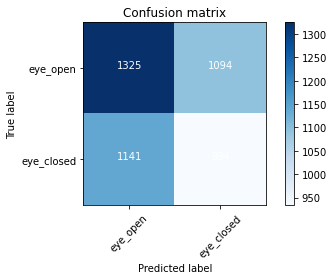

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified_1 = classification_baseline_metrics(clf_stratified,X_train,X_test,y_train,y_test)
stratified_diagrams= classification_baseline(clf_stratified,X_train,X_test,y_train,y_test,True,False)

Όπως και παραπάνω, παρατηρούμε ότι αν τρέξουμε το πρoηγούμενο κελί διαδοχικές φορές, το accuracy αλλάζει γιατί καλούμε εκ νέου τον ταξινομητή να κάνει (τυχαίες) προβλέψεις.

##### Dummy Most Frequent

10-fold corss validation accuracy of DummyClassifier(strategy='most_frequent') is : [0.55195424 0.55195424 0.55195424 0.55195424 0.55195424 0.55290753
 0.55248092 0.55248092 0.55248092 0.55248092]
Accuracy score is  0.5522602405780861
f1 weighted score = 0.39296428556146196


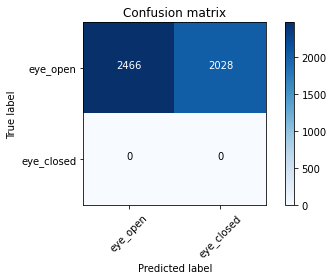

In [ ]:
clf_most_frequent = DummyClassifier(strategy="most_frequent")
most_frequent = classification_baseline_metrics(clf_most_frequent,X_train,X_test,y_train,y_test)
most_frequent_diagrams= classification_baseline(clf_most_frequent,X_train,X_test,y_train,y_test,True,False)

##### Dummy Prior

10-fold corss validation accuracy of DummyClassifier() is : [0.55195424 0.55195424 0.55195424 0.55195424 0.55195424 0.55290753
 0.55248092 0.55248092 0.55248092 0.55248092]
Accuracy score is  0.5522602405780861
f1 weighted score = 0.39296428556146196


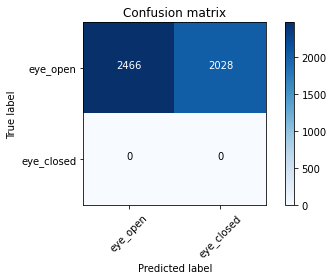

In [ ]:
clf_prior = DummyClassifier(strategy="prior")
prior = classification_baseline_metrics(clf_prior,X_train,X_test,y_train,y_test)
prior_diagrams= classification_baseline(clf_prior,X_train,X_test,y_train,y_test,True,False)


##### Dummy Constant 0

10-fold corss validation accuracy of DummyClassifier(constant=0, strategy='constant') is : [0.55195424 0.55195424 0.55195424 0.55195424 0.55195424 0.55290753
 0.55248092 0.55248092 0.55248092 0.55248092]
Accuracy score is  0.5522602405780861
f1 weighted score = 0.39296428556146196


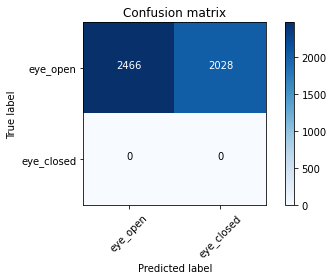

In [ ]:
clf_constant_0 = DummyClassifier(strategy="constant", constant = 0)
constant_0 = classification_baseline_metrics(clf_constant_0,X_train,X_test,y_train,y_test)
constant_0_diagrams= classification_baseline(clf_constant_0,X_train,X_test,y_train,y_test,True,False)

##### Dummy Constant 1

10-fold corss validation accuracy of DummyClassifier(constant=1, strategy='constant') is : [0.44804576 0.44804576 0.44804576 0.44804576 0.44804576 0.44709247
 0.44751908 0.44751908 0.44751908 0.44751908]
Accuracy score is  0.447739759421914
f1 weighted score = 0.276943342184493


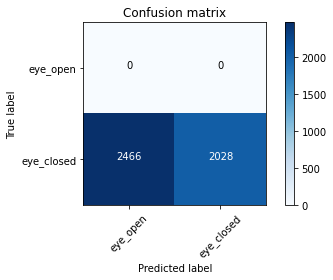

In [ ]:
clf_constant_1 = DummyClassifier(strategy="constant", constant = 1)
constant_1 = classification_baseline_metrics(clf_constant_1,X_train,X_test,y_train,y_test)
constant_1_diagrams= classification_baseline(clf_constant_1,X_train,X_test,y_train,y_test,True,False)

#### Gaussian Naive Bayes

Συνεχίζουμε με τον Gaussian Naive Bayes classifier. Ο ταξινομητής αυτός χαρακτηρίζεται ως naive, επειδή υποθέτει ανεξαρτησία των χαρακτηριστικών μεταξύ τους. H βασική ιδέα λειτουργίας του ταξινομητή είναι ο γνωστός νόμος του Bayes:  $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

Ο ταξινομητής ταξινομεί κάθε δεδομένο στην κλάση y σύμφωνα με τον εξής τύπο: $$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$ δηλαδή κάθε δείγμα ταξινομείται στην κλάση που μεγιστοποιεί τη σχετική συχνότητα της κλάσης αυτής επί το γινόμενο των πιθανοτήτων όλων των χαρακτηριστικών, δεδομένης της κλάσης αυτής(πιθανοφάνεια).

Θεωρούμε ότι η κατανομή κάθε χαρακτηριστικού ως προς κάθε κλάση ακολουθεί την κανονική κατανομή:
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

Πρακτικά, όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set)είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνεια του χαρακτηριστικού.


10-fold corss validation accuracy of GaussianNB() is : [0.5042898  0.51000953 0.55195424 0.47092469 0.51477598 0.49285033
 0.48950382 0.5610687  0.49045802 0.4990458 ]
Accuracy score is  0.5084880911664326
f1 weighted score = 0.440418570186959


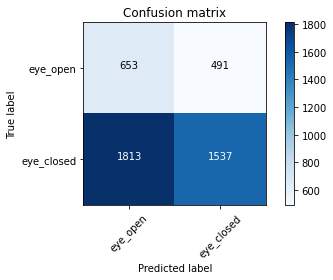

In [ ]:
clf = GaussianNB()
GNB_1 = classification_baseline_metrics(clf,X_train,X_test,y_train,y_test)
GNB_diagrams= classification_baseline(clf,X_train,X_test,y_train,y_test,True,False)

#### kNN Classifier

Στην συνέχεια εξετάζουμε και τον KNN classifier. Αυτός ταξινομεί ανάλογα με την κλάση των n κοντινότερων γειτόνων με βάση κάποια συνάρτηση απόστασης, συνήθως ευκλείδεια:
$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$

Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων (διαλέγουμε k περιττό γενικά), είτε απλά υπολογισμένη (άθροισμα) είτε (αντίστροφα) ζυγισμένη με βάση την απόσταση του κάθε γείτονα. Η default τιμή του αριθμού γειτόνων είναι 5.

10-fold corss validation accuracy of KNeighborsClassifier() is : [0.95519542 0.94947569 0.95900858 0.957102   0.96377502 0.96472831
 0.95706107 0.95515267 0.97041985 0.96183206]
Accuracy score is  0.9593750682220072
f1 weighted score = 0.9593563331097164


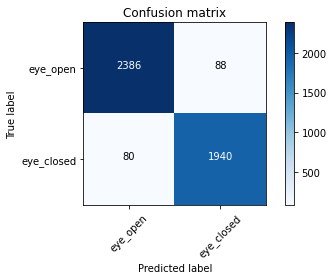

In [ ]:
clf = KNeighborsClassifier()
Knn_1= classification_baseline_metrics(clf,X_train,X_test,y_train,y_test)
Knn_diagrams= classification_baseline(clf,X_train,X_test,y_train,y_test,True,False)

#### Logistic Regression

Στην συνέχεια χρησιμοποιούμε την λογιστική παλινδρόμηση.

O ταξινομητής λογιστικής παλινδρόμησης είναι κυρίως κατάλληλος για binary problems με διακριτές κατηγορίες. Το πρόβλημά μας είναι ένα τέτοιο πρόβλημα.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10-fold corss validation accuracy of LogisticRegression() is : [0.64251668 0.64728313 0.64823642 0.63489037 0.64156339 0.61582459
 0.67366412 0.63835878 0.64980916 0.65744275]
Accuracy score is  0.6449589394479658
f1 weighted score = 0.6367199012210862


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


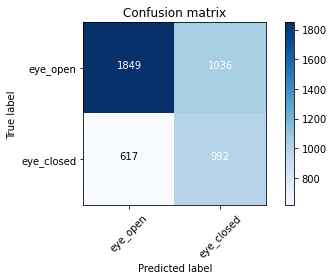

In [ ]:
clf = LogisticRegression()
LR_1= classification_baseline_metrics(clf,X_train,X_test,y_train,y_test)
LR_diagrams= classification_baseline(clf,X_train,X_test,y_train,y_test,True,False)

#### Συγκρίσεις ταξινομητών

##### Πίνακας Markdοwn



Στην ενότητα αυτή θα  συγκρίνουμε τους παραπάνω ταξινομητές. Αρχικά θα συνοψίσουμε τα αποτελέσματα σε ένα πίνακα markdown:

In [ ]:
t = Texttable()

accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Uniform","Dummy Stratified","Dummy Most Frequent","Dummy Prior", "Dummy Constant 0", "Dummy Constant 1 ","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[uniform, stratified_1,most_frequent,prior,constant_0,constant_1,GNB_1,Knn_1,LR_1]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())

+---------------------+----------+-------------------+
|     Classifier      | Accuracy | F1 score weighted |
+=====================+==========+===================+
| Dummy Uniform       | 0.497    | 0.503             |
+---------------------+----------+-------------------+
| Dummy Stratified    | 0.517    | 0.504             |
+---------------------+----------+-------------------+
| Dummy Most Frequent | 0.552    | 0.393             |
+---------------------+----------+-------------------+
| Dummy Prior         | 0.552    | 0.393             |
+---------------------+----------+-------------------+
| Dummy Constant 0    | 0.552    | 0.393             |
+---------------------+----------+-------------------+
| Dummy Constant 1    | 0.448    | 0.277             |
+---------------------+----------+-------------------+
| Gaussian NB         | 0.508    | 0.440             |
+---------------------+----------+-------------------+
| KNN                 | 0.959    | 0.959             |
+---------

##### Bar Plot Σύγκρισης


Έχοντας υπολογίσει αναλυτικά στα προηγούμενα βήματα τις μετρικές απόδοσης accuracy και F1 score (weighted) για τους Dummy, Gaussian Naive Bayes, KNN και LR ταξινομητές, παρουσιάζουμε συγκεντρωτικά τα αποτελέσματα με γραφική απεικόνιση, ώστε να συγκρίνουμε την απόδοσή τους:

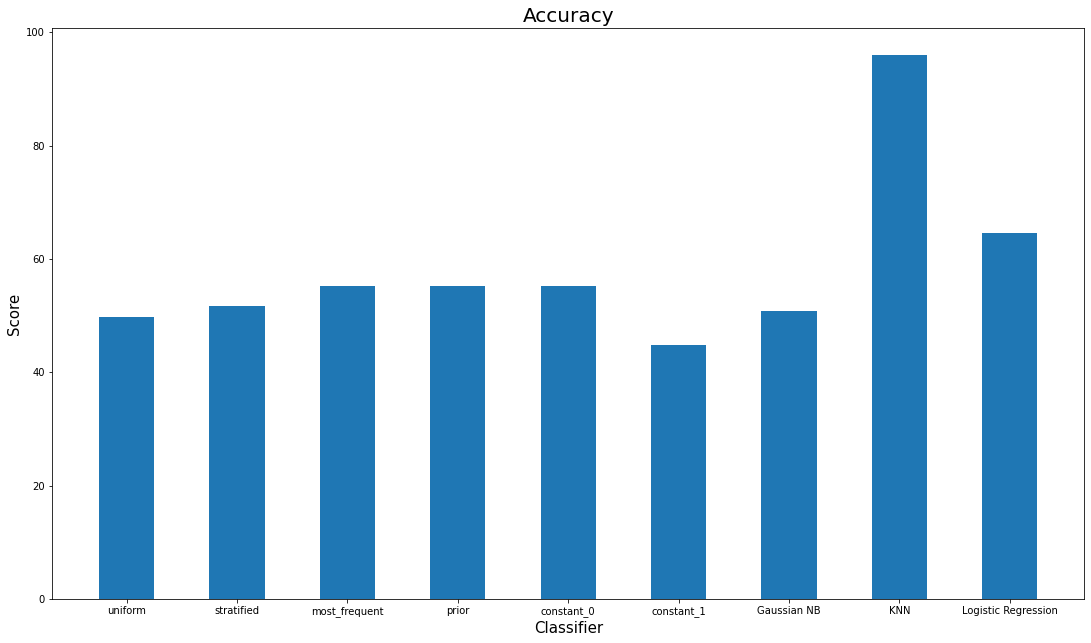

In [ ]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
x = ['uniform','stratified', 'most_frequent','prior', 'constant_0','constant_1','Gaussian NB','KNN','Logistic Regression']
y=[100*uniform[2], 100*stratified_1[2], 100*most_frequent[2], 100*prior[2], 100*constant_0[2],100*constant_1[2],100*GNB_1[2],100*Knn_1[2],100*LR_1[2]]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('Accuracy', fontsize=20 )
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()

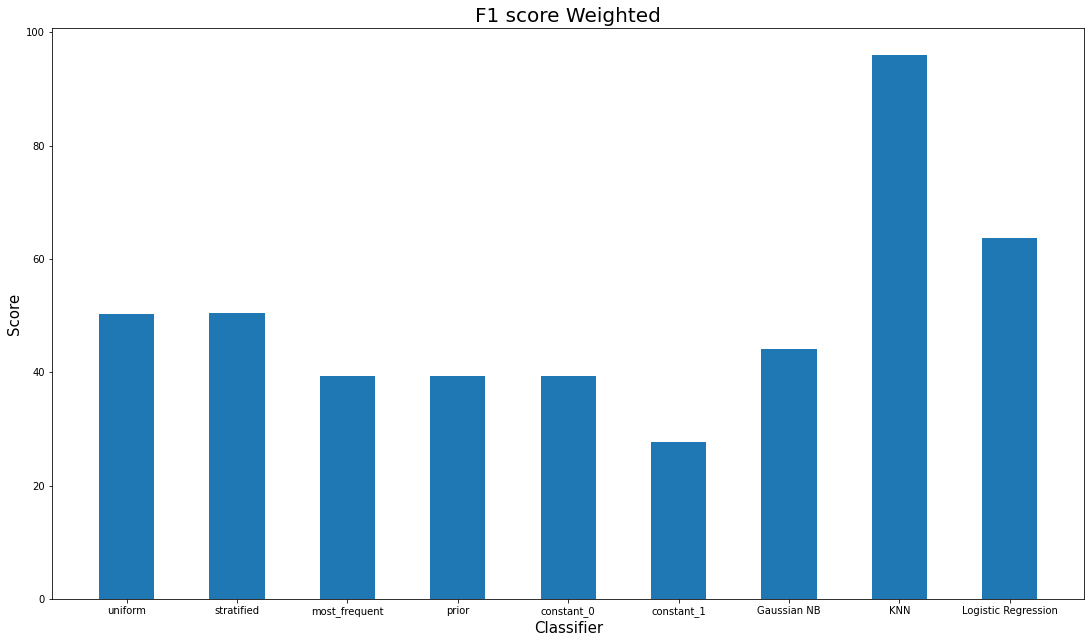

In [ ]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
x = ['uniform','stratified', 'most_frequent','prior', 'constant_0','constant_1','Gaussian NB','KNN','Logistic Regression']
y=[100*uniform[1], 100*stratified_1[1], 100*most_frequent[1], 100*prior[1], 100*constant_0[1],100*constant_1[1],100*GNB_1[1],100*Knn_1[1],100*LR_1[1]]
plt.bar(x,y, align='center', width=0.5)
plt.xticks(x,x)
plt.title('F1 score Weighted', fontsize=20)
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()

##### Σχολιασμός Αποτελεσμάτων


* Παρατηρούμε πως σε αρκετούς από τους ταξινομητές το ποσοστό accuracy είναι ψηλότερο από το F1 scrore. Κάτι τέτοιο αναδυκνύει την σημασία χρήση επιπλέον μετρικών εκτός του accuracy, καθώς η χρήση μόνο αυτής θα μπορούσε να μας οδηγήσει σε παραπλανητικά συμπεράσματα όσον αφορά την επίδοση ενός ταξινομητή. Συγκεκριμένα, το accuracy δίνει έμφαση στον αριθμό true positives και true  negatives, ενώ με το F2 score δίνεται έμφαση και στον αριθμό false negatives και false positives.
* Ο ταξινομητής Gaussian NB δεν οδηγεί σε σημαντικά καλύτερα αποτελέσματα σε σχέση με τους Dummy ταξινομητές. Συγκεκριμένα, έχει παρόμοιο accuracy, ενώ το F1 score είναι σε κάποιες περιπτώσεις λίγο καλύτερο και σε κάποιες λίγο χειρότερο από τους Dummy. Αυτό είναι λογικό, δεδομένου ότι ο ταξινομητής Gaussian NB είναι ένας αρκετά απλός ταξινομητής, με απλουστεύσεις στις υποθέσεις του (υποθέτει gaussian κατανομή και ανεξάρτητα δεδομένα) και επομένως η ικανότητα μοντελοποίησής του είναι περιορισμένη.
* Ο ταξινομητής KNN επιτυγχάνει τα βέλτιστα αποτελέσματα, οδηγώντας σε πολύ υψηλά ποσοστά accuracy και F1 score. Βέβαια, κάτι τέτοιο επιτυγχάνεται με τίμημα την υψηλή πολυπλοκότητα και τον μεγαλύτερο χρόνο εκπαίδευσης, τον οποίο απαιτεί ο ταξινομητής αυτός.
* O ταξινομητής LR επιτυγχάνει μεν καλύτερο accuracy και F1 score σε σχέση με τους Gaussian NB και Dummy, σε καμία όμως περίπτωση δεν είναι τα αποτελέσματά του συγκρίσιμα με αυτά του KNN.
* Οι dummy classifiers, σε κάθε run παρουσιάζουν διαφορετικές αποδόσεις και κάθε φορά άλλος εμφανίζεται καλύτερος και άλλος χειρότερος.


### Βελτιστοποίηση ταξινομητών

Στόχος μας τωρα είναι να βελτιστοποιήσουμε την επίδοση των ταξινομητών, εφαρμόζοντας προεπεξεργασία στα δεδομένα, ορίζοντας τα pipelines και βελτιστοποιώντας τις υπερπαραμέτρους τους.





#### Προεπεξεργασία

##### Μείωση διαστάσεων εισόδου με επιλογή χαρακτηριστικών

Μια απλή τεχνική επιλογής χαρακτηριστικών είναι το ελάχιστο κατώφλι της διακύμανσης (Variance threshold). Γενικά αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Αν η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό έχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμεύει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηριστικών. Έτσι, αφαιρούμε πάντα τα χαρακτηρηστικά με μηδενική διακύμανση, ενώ μπορεί να χρειαστεί να αφαιρέσουμε και χαρακτηρηστικά με μικρή αλλά μη μηδενική διακύμανση.


Αρχικά ελέγχουμε αν χρειάζεται να αφαιρεθούν χαρακτηρηστικά με μηδενική διακύμανση:

In [ ]:
selector = VarianceThreshold()                      # initialize selector with zero variance threshold
X_train_reduced = selector.fit_transform(X_train)   # fit to train data

mask = selector.get_support()                       # mask that decides if the selector will keep each attribute
print('Mask is:')
print(mask)

X_test_reduced = selector.transform(X_test)        # we assume that test data has zero variance in the same features with test data
print('Dataset with reduced dimensions has {} features.'.format(X_test_reduced.shape[1]))

Mask is:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Dataset with reduced dimensions has 14 features.


Παρατηρούμε ότι σε κανένα feature η τιμή του variance δεν είναι 0, για αυτό και δεν αφαιρέθηκε κανένα χαρακτηρηστικό. Στην συνέχεια, εξετάζουμε τις τιμές variance των υπολοίπων χαρακτηριστικών, καθώς ενδεχομένως είναι χρήσιμο να αφαιρέσουμε και χαρακτηρηστικά με πολύ μικρό variance:

In [ ]:
Xvar = np.var(X_train_reduced, axis=0)
print('Variance values are:')
print(Xvar)

Variance values are:
[8.86967333e+06 2.50178329e+03 2.31731300e+03 8.80427622e+02
 1.16613360e+03 1.22181166e+07 1.33228042e+03 1.06377419e+03
 6.51877166e+06 1.34205342e+03 1.41881060e+03 1.63723434e+03
 2.08514021e+06 4.82795967e+07]


Παρατηρούμε γενικά πως διαθέτουμε χαρακτηριστικά με πολύ μεγάλο variance και λίγα με μικρότερο συγκριτικά variance. Παρακάτω θα φανούν μερικοί πειραματισμοί με την τιμή του κατωφλιού.

**Πειραματισμοί με το κατώφλι του variance**

Κατώφλι 1000

---



In [ ]:
selector = VarianceThreshold(threshold=1000)
X_train_reduced_1 = selector.fit_transform(X_train_reduced)
mask = selector.get_support()
print('Mask is:')
print(mask)
X_test_reduced_1 = X_test_reduced[:,mask]

print('Dataset with reduced dimensions has {} features.'.format(X_test_reduced_1.shape[1]))

Mask is:
[ True  True  True False  True  True  True  True  True  True  True  True
  True  True]
Dataset with reduced dimensions has 13 features.


Παρατηρούμε πως αφαιρέθηκε ένα χαρακτηριστικό. Ελέγχουμε τις επιδόσεις των ταξινομητών στα νέα δεδομένα:

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified = classification_baseline_metrics(clf_stratified,X_train_reduced_1,X_test_reduced_1,y_train,y_test)
print('\n')
clf = GaussianNB()
GNB = classification_baseline_metrics(clf,X_train_reduced_1,X_test_reduced_1,y_train,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,X_train_reduced_1,X_test_reduced_1,y_train,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,X_train_reduced_1,X_test_reduced_1,y_train,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Stratified","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.50238322 0.4957102  0.52335558 0.51096282 0.52430887 0.50333651
 0.49141221 0.52480916 0.4990458  0.4971374 ]
Accuracy score is  0.5072461777483463
f1 weighted score = 0.5007942111755083


10-fold corss validation accuracy of GaussianNB() is : [0.49761678 0.51096282 0.55195424 0.47092469 0.521449   0.49761678
 0.49236641 0.5610687  0.48950382 0.5019084 ]
Accuracy score is  0.5095371637109861
f1 weighted score = 0.4432411914212315


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.95138227 0.95519542 0.95996187 0.95042898 0.95900858 0.95996187
 0.95229008 0.94656489 0.96469466 0.95419847]
Accuracy score is  0.9553687081116877
f1 weighted score = 0.9553488870525554




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10-fold corss validation accuracy of LogisticRegression() is : [0.63584366 0.62249762 0.64442326 0.61963775 0.6406101  0.62154433
 0.66889313 0.63740458 0.64694656 0.63645038]
Accuracy score is  0.6374251377174918
f1 weighted score = 0.6283138006067224
+---------------------+----------+-------------------+
|     Classifier      | Accuracy | F1 score weighted |
+=====================+==========+===================+
| Dummy Stratified    | 0.507    | 0.501             |
+---------------------+----------+-------------------+
| Gaussian NB         | 0.510    | 0.443             |
+---------------------+----------+-------------------+
| KNN                 | 0.955    | 0.955             |
+---------------------+----------+-------------------+
| Logistic Regression | 0.637    | 0.628             |
+---------------------+----------+-------------------+


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Κατώφλι 1500

---



In [ ]:
selector = VarianceThreshold(threshold=1500)
X_train_reduced_1 = selector.fit_transform(X_train_reduced)
mask = selector.get_support()
print('Mask is:')
print(mask)
X_test_reduced_1 = X_test_reduced[:,mask]

print('Dataset with reduced dimensions has {} features.'.format(X_test_reduced_1.shape[1]))

Mask is:
[ True  True  True False False  True False False  True False False  True
  True  True]
Dataset with reduced dimensions has 8 features.


Παρατηρούμε πως αφαιρέθηκαν ακόμα 6 χαρακτηριστικά. Ελέγχουμε τις επιδόσεις των ταξινομητών:

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified = classification_baseline_metrics(clf_stratified,X_train_reduced_1,X_test_reduced_1,y_train,y_test)
print('\n')
clf = GaussianNB()
GNB = classification_baseline_metrics(clf,X_train_reduced_1,X_test_reduced_1,y_train,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,X_train_reduced_1,X_test_reduced_1,y_train,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,X_train_reduced_1,X_test_reduced_1,y_train,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Stratified","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())

10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.53765491 0.51763584 0.5042898  0.51096282 0.50333651 0.50905624
 0.49522901 0.48473282 0.5        0.50763359]
Accuracy score is  0.5070531549494611
f1 weighted score = 0.5080542088476061


10-fold corss validation accuracy of GaussianNB() is : [0.55195424 0.55958055 0.55195424 0.46901811 0.56625357 0.56053384
 0.56774809 0.55438931 0.55916031 0.5620229 ]
Accuracy score is  0.5502615176940597
f1 weighted score = 0.4326119243166066


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.86558627 0.86844614 0.88274547 0.87321258 0.87511916 0.85319352
 0.88740458 0.86164122 0.86450382 0.875     ]
Accuracy score is  0.8706852764173802
f1 weighted score = 0.8706103077210458


10-fold corss validation accuracy of LogisticRegression() is : [0.59675882 0.60057197 0.61391802 0.60057197 0.62249762 0.607245
 0.64503817 0.60877863 0.61545802 0.61545802]
Accuracy score is  0.6126296218135774
f1 weighted

Σχολιασμός

---



Παρατηρούμε ότι όσο αυξάνεται η τιμή του threshold τόσο η τιμή του accuracy και του f1 score μειώνεται. Αυτό είναι λογικό γιατί όπως φαίνεται παραπάνω οι τιμές variance των χαρακτηριστικών του dataset είναι μεγάλες. Συνεπώς μας παρέχουν σημαντική πληροφορία, οπότε η μείωση των χαρακτηριστικών δεν οδηγεί σε καλά αποτελέσματα. Επομένως δεν θα χρησιμοποιήσουμε κάποιο variance threshold στα δεδομένα μας.

##### Κανονικοποίηση Χαρακτηριστικών

Στην συνέχεια επιλέγουμε να πραγματοποιήσουμε κανονικοποίηση, ώστε να μην επιδρούν περισσότερο στην εκπαίδευση του ταξινομητή ορισμένα χαρακτηριστικά επειδή απλώς έχουν μεγαλύτερες τιμές. Θα δοκιμάσουμε να κανονικοποιήσουμε τα δεδομένα χρησιμοποιώντας 2 διαφορές τεχνικές: το feature scaling και το standardization και θα συγκρίνουμε τι συμβαίνει σε κάθε περίπτωση.


Επίσης, πρέπει να αναφερθεί πως όταν κάνουμε μετασχηματισμό κανονικοποίησης στο train set θα πρέπει αντίστοιχα να προσαρμόσουμε και τα δεδομένα του test set, χρησιμοποιώντας τη μέση τιμή και την απόκλιση που υπολογίσαμε για το train set.

**Standardization**

In [ ]:
#standardization

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified = classification_baseline_metrics(clf_stratified,X_train_scaled,X_test_scaled,y_train,y_test)
print('\n')

clf = GaussianNB()
GNB = classification_baseline_metrics(clf,X_train_scaled,X_test_scaled,y_train,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,X_train_scaled,X_test_scaled,y_train,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,X_train_scaled,X_test_scaled,y_train,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Stratified","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.52240229 0.52335558 0.50333651 0.48808389 0.50333651 0.5128694
 0.49618321 0.49427481 0.49427481 0.49141221]
Accuracy score is  0.5029529213573086
f1 weighted score = 0.502202322810993


10-fold corss validation accuracy of GaussianNB() is : [0.5042898  0.51000953 0.55195424 0.47092469 0.51477598 0.49285033
 0.48950382 0.5610687  0.49045802 0.4990458 ]
Accuracy score is  0.5084880911664326
f1 weighted score = 0.440418570186959


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.91039085 0.89990467 0.90943756 0.90753098 0.89990467 0.90943756
 0.91316794 0.89503817 0.91316794 0.91412214]
Accuracy score is  0.9072102474912496
f1 weighted score = 0.9071742674009838


10-fold corss validation accuracy of LogisticRegression() is : [0.58817922 0.59199237 0.58627264 0.59103908 0.58341277 0.58245949
 0.61354962 0.58587786 0.60209924 0.59160305]
Accuracy score is  0.5916485347732119
f1 weighted 

Σχολιασμός

---



Παρατηρούμε ότι τα αποτελέσματα με την μέθοδο του standardization είναι χειρότερα. Άρα δεν θα ακολουθήσουμε τη μέθοδο αυτή.

**Feature Scaling**

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified = classification_baseline_metrics(clf_stratified,X_train_minmax,X_test_minmax,y_train,y_test)
print('\n')

clf = GaussianNB()
GNB = classification_baseline_metrics(clf,X_train_minmax,X_test_minmax,y_train,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,X_train_minmax,X_test_minmax,y_train,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,X_train_minmax,X_test_minmax,y_train,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Stratified","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.52526215 0.4957102  0.50333651 0.51763584 0.52526215 0.52430887
 0.48187023 0.49522901 0.49618321 0.51431298]
Accuracy score is  0.5079111149113296
f1 weighted score = 0.5088864320113818


10-fold corss validation accuracy of GaussianNB() is : [0.5042898  0.51000953 0.55195424 0.47092469 0.51477598 0.49285033
 0.48950382 0.5610687  0.49045802 0.4990458 ]
Accuracy score is  0.5084880911664326
f1 weighted score = 0.440418570186959


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.88751192 0.8884652  0.8970448  0.8970448  0.8970448  0.90753098
 0.89599237 0.88167939 0.90458015 0.90362595]
Accuracy score is  0.8960520379277973
f1 weighted score = 0.8959988426847808


10-fold corss validation accuracy of LogisticRegression() is : [0.55195424 0.55290753 0.55195424 0.55386082 0.55481411 0.5557674
 0.55438931 0.55629771 0.55534351 0.55248092]
Accuracy score is  0.5539769791659086
f1 weighted

Σχολιασμός

---



Παρατηρούμε ότι τα αποτελέσματα με την μέθοδο του feature scaling είναι χειρότερα. Άρα δεν θα ακολουθήσουμε τη μέθοδο αυτή.

##### Εξισορρόπηση dataset

Το dataset, όπως είδαμε και παραπάνω είναι σχετικά ισορροπημένο. Συνεπώς δεν αναμένουμε ουσιαστική διαφορά στα αποτελέσματα. Παρόλα αυτά θα δοκιμάσουμε να κάνουμε περαιτέρω εξισσορόπηση και Θα συγκρίνουμε λοιπόν δύο μεθόδους εξισορρόπησης, το Undersampling και το Oversampling.

Στην αρχή, ελέγχουμε πόσα δείγματα υπάρχουν από κάθε κλάση στο train set:

In [ ]:
print((y_train==0).sum())
print((y_train==1).sum())

5791
4695


Το train set είναι σχεδόν ισσοροπημένο (55.22% - 44,77%). Δοκιμάζουμε μήπως υπάρχει κάποια βελτίωση με τη μέθοδο Oversampling ή Undersampling.

###### Oversampling

In [ ]:
#initialize RandomOverSampler
ros = RandomOverSampler()
X_train_resampled, X_train_labels_resampled = ros.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(X_train_labels_resampled.shape)
print(X_train_labels_resampled)

(11582, 14)
(11582,)
[1 1 0 ... 1 1 1]


Επιβεβαιώνουμε ότι όλες οι κλάσεις έχουν τον ίδιο αριθμό δειγμάτων:

In [ ]:
print((X_train_labels_resampled==0).sum())
print((X_train_labels_resampled==1).sum())

5791
5791


Ελέγχουμε τις επιδόσεις των ταξινομητών:

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified = classification_baseline_metrics(clf_stratified,X_train_resampled,X_test,X_train_labels_resampled,y_test)
print('\n')

clf = GaussianNB()
GNB = classification_baseline_metrics(clf,X_train_resampled,X_test,X_train_labels_resampled,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,X_train_resampled,X_test,X_train_labels_resampled,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,X_train_resampled,X_test,X_train_labels_resampled,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Stratified","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.50388266 0.49870578 0.50431779 0.50863558 0.49309154 0.50345423
 0.50172712 0.51208981 0.50086356 0.50949914]
Accuracy score is  0.5036267194785571
f1 weighted score = 0.4962822193353472


10-fold corss validation accuracy of GaussianNB() is : [0.50992235 0.54098361 0.5        0.51899827 0.51381693 0.52158895
 0.52849741 0.52072539 0.51727116 0.53367876]
Accuracy score is  0.5205482810057507
f1 weighted score = 0.4323091760798426


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.94736842 0.9594478  0.96977547 0.96200345 0.96286701 0.94559585
 0.95854922 0.9671848  0.96804836 0.97150259]
Accuracy score is  0.9612342991173678
f1 weighted score = 0.96123210019088




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10-fold corss validation accuracy of LogisticRegression() is : [0.63244176 0.62208801 0.62694301 0.61658031 0.61571675 0.62694301
 0.6433506  0.63385147 0.63126079 0.62435233]
Accuracy score is  0.6273528039924836
f1 weighted score = 0.6271741154145742
+---------------------+----------+-------------------+
|     Classifier      | Accuracy | F1 score weighted |
+=====================+==========+===================+
| Dummy Stratified    | 0.504    | 0.496             |
+---------------------+----------+-------------------+
| Gaussian NB         | 0.521    | 0.432             |
+---------------------+----------+-------------------+
| KNN                 | 0.961    | 0.961             |
+---------------------+----------+-------------------+
| Logistic Regression | 0.627    | 0.627             |
+---------------------+----------+-------------------+


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Σχολιασμός

---



Παρατηρούμε ότι με τη μέθοδο του Oversampling δεν έχουμε σημαντική διαφορά στα αποτελέσματα. Άρα από τη στιγμή που προκύπτουν παρόμοια αποτελέσματα  με τα αρχικά, δεν θα χρησιμοποιήσουμε τη μέθοδο αυτή.

######  Undersampling

In [ ]:
#initialize RandomUnderSampler
ros = RandomUnderSampler(sampling_strategy='majority') #resample only the majority class
X_train_resampled, X_train_labels_resampled = ros.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(X_train_labels_resampled.shape)
print(X_train_labels_resampled)

(9390, 14)
(9390,)
[0 0 0 ... 1 1 1]


Επιβεβαιώνουμε ότι όλες οι κλάσεις έχουν τον ίδιο αριθμό δειγμάτων:

In [ ]:
print((X_train_labels_resampled==0).sum())
print((X_train_labels_resampled==1).sum())

4695
4695


Ελέγχουμε τις επιδόσεις των ταξινομητών:

In [ ]:
clf_stratified = DummyClassifier(strategy="stratified")
stratified = classification_baseline_metrics(clf_stratified,X_train_resampled,X_test,X_train_labels_resampled,y_test)
print('\n')

clf = GaussianNB()
GNB = classification_baseline_metrics(clf,X_train_resampled,X_test,X_train_labels_resampled,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,X_train_resampled,X_test,X_train_labels_resampled,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,X_train_resampled,X_test,X_train_labels_resampled,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy Stratified","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of DummyClassifier(strategy='stratified') is : [0.49733759 0.45473908 0.485623   0.50692226 0.51011715 0.49307774
 0.47071353 0.49946752 0.50585729 0.51331203]
Accuracy score is  0.4937167199148029
f1 weighted score = 0.49436348452812623


10-fold corss validation accuracy of GaussianNB() is : [0.50159744 0.50905218 0.52502662 0.50585729 0.53035144 0.51011715
 0.49520767 0.51331203 0.49414271 0.51331203]
Accuracy score is  0.5097976570820022
f1 weighted score = 0.4221684429287681


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.95633653 0.94462194 0.95633653 0.96059638 0.95953142 0.94888179
 0.9456869  0.95633653 0.96166134 0.95101171]
Accuracy score is  0.9541001064962726
f1 weighted score = 0.9540975015448409




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


10-fold corss validation accuracy of LogisticRegression() is : [0.63791267 0.66134185 0.62619808 0.62300319 0.63897764 0.59105431
 0.62193823 0.63791267 0.63045793 0.63684771]
Accuracy score is  0.6305644302449414
f1 weighted score = 0.6304667813548519
+---------------------+----------+-------------------+
|     Classifier      | Accuracy | F1 score weighted |
+=====================+==========+===================+
| Dummy Stratified    | 0.494    | 0.494             |
+---------------------+----------+-------------------+
| Gaussian NB         | 0.510    | 0.422             |
+---------------------+----------+-------------------+
| KNN                 | 0.954    | 0.954             |
+---------------------+----------+-------------------+
| Logistic Regression | 0.631    | 0.630             |
+---------------------+----------+-------------------+


Σχολιασμός

---



Παρατηρούμε ότι με τη μέθοδο του Undersampling δεν έχουμε σημαντική διαφορά στα αποτελέσματα. Άρα από τη στιγμή που προκύπτουν παρόμοια αποτελέσματα  με τα αρχικά, δεν θα χρησιμοποιήσουμε τη μέθοδο αυτή.

##### PCA Analysis

Η ανάλυση σε κύριες συνιστώσες (PCA) είναι η ευρέως διαδεδομένη μέθοδος μείωσης της διαστατικότητας. Στην συνέχεια εφαρμόζουμε την μέθοδο αυτή:

In [ ]:
from sklearn.decomposition import PCA

n = 10
pca_1 = PCA(n_components = n)

trainPCA_1 = pca_1.fit_transform(X_train)
testPCA_1 = pca_1.transform(X_test)

print('Dimensions of train samples array:',X_train.shape)
print('Dimensions of train samples array after PCA:',trainPCA_1.shape)
print('Dimensions of test samples array:',X_test.shape)
print('Dimensions of test samples array after PCA:',testPCA_1.shape)

Dimensions of train samples array: (10486, 14)
Dimensions of train samples array after PCA: (10486, 10)
Dimensions of test samples array: (4494, 14)
Dimensions of test samples array after PCA: (4494, 10)


Ελέγχουμε τις επιδόσεις των ταξινομητών:

In [ ]:
clf = DummyClassifier()
stratified = classification_baseline_metrics(clf,trainPCA_1,testPCA_1,y_train,y_test)
print('\n')

clf = GaussianNB()
GNB = classification_baseline_metrics(clf,trainPCA_1,testPCA_1,y_train,y_test)

print('\n')
clf = KNeighborsClassifier()
Knn = classification_baseline_metrics(clf,trainPCA_1,testPCA_1,y_train,y_test)

print('\n')
clf = LogisticRegression()
LR = classification_baseline_metrics(clf,trainPCA_1,testPCA_1,y_train,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[stratified, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of DummyClassifier() is : [0.55195424 0.55195424 0.55195424 0.55195424 0.55195424 0.55290753
 0.55248092 0.55248092 0.55248092 0.55248092]
Accuracy score is  0.5522602405780861
f1 weighted score = 0.39296428556146196


10-fold corss validation accuracy of GaussianNB() is : [0.47759771 0.48236416 0.56053384 0.47378456 0.48808389 0.47187798
 0.46183206 0.55916031 0.48568702 0.49332061]
Accuracy score is  0.49542421353670163
f1 weighted score = 0.3948887333696421


10-fold corss validation accuracy of KNeighborsClassifier() is : [0.93612965 0.92945663 0.91325071 0.92755005 0.93803622 0.9399428
 0.92461832 0.91984733 0.94083969 0.92843511]
Accuracy score is  0.9298106520932331
f1 weighted score = 0.9297255376052656


10-fold corss validation accuracy of LogisticRegression() is : [0.5815062  0.60343184 0.59389895 0.58055291 0.5986654  0.57959962
 0.60782443 0.58587786 0.60591603 0.60305344]
Accuracy score is  0.5940326665162751
f1 weighted score = 0.5792318

Σχολιασμός

---



Παρατηρούμε ότι με τη μέθοδο PCA χειροτερεύουν τα αποτελέσματα. Άρα από τη στιγμή που προκύπτουν παρόμοια αποτελέσματα  χειρότερα από τα αρχικά, δεν θα χρησιμοποιήσουμε τη μέθοδο αυτή.

#### Ορισμός Pipelines

Στο βήμα αυτό ορίζουμε pipelines. Μια ολοκληρωμένη διαδικασία pipeline λόγω του ότι τελειώνει σε έναν εκτιμητή μπορεί να θεωρηθεί και συνολικά ως ένας εκτιμητής, με κανένα, με λίγους ή με περισσότερους μετασχηματιστές πριν από τον εκτιμητή. Στην συγκεκριμένη περίπτωση, όπως προέκυψε από τους επιμέρους πειραματισμούς μας πάνω σε διάφορα στάδια προεπεξεργασίας νωρίτερα, δεν χρησιμοποιούμε μετασχηματισμούς για προεπεξεργασία των δεδομένων μας. Έτσι, αν ορίσουμε pipelines, αυτά θα έχουν ένα μόνο step, αυτό του ταξινομητή. Π.χ.:

```
dummy_pipe = Pipeline(steps=[('dummy', dummy_clf_pl)])

```

Επομένως, δεν έχει νόημα να χρησιμοποιήσουμε pipelines.

Στην συνέχεια ορίζουμε pipelines με επιμέρους στάδια προεπεξεργασίας ενδεικτικά, προκειμένου να δείξουμε τον τρόπο χρήσης τους. Σημειώνουμε όμως ότι δεν θα χρησιμοποιηθούν στην συνέχεια:

In [ ]:
from imblearn.pipeline import Pipeline

pca_1 = PCA()

dummy_clf_pl = DummyClassifier()
clf_gnb = GaussianNB()
clf_knn = KNeighborsClassifier()
clf_LR = LogisticRegression()

dummy_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('dummy', dummy_clf_pl)])
GNB_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('GNB', clf_gnb)])
KNN_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('KNN', clf_knn)])
LR_pipe = Pipeline(steps=[('selector',selector), ('scaler', scaler), ('sampler', ros), ('pca', pca_1),('LR', clf_LR)])

Ελέγχουμε τα αποτελέσματα των ταξινομητών-pipelines:

In [ ]:
dummy = classification_baseline_metrics(dummy_pipe,X_train,X_test,y_train,y_test)
print('\n')

GNB = classification_baseline_metrics(GNB_pipe,X_train,X_test,y_train,y_test)

print('\n')

Knn = classification_baseline_metrics(KNN_pipe,X_train,X_test,y_train,y_test)

print('\n')

LR = classification_baseline_metrics(LR_pipe,X_train, X_test,y_train,y_test)


t = Texttable()
accuracy = []
columns = [['Classifier','Accuracy','F1 score weighted']]
rows = ["Dummy ","Gaussian NB","KNN","Logistic Regression"]
classifiers_list=[dummy, GNB, Knn, LR]
for i,clf in enumerate(classifiers_list):
    columns.append([rows[i],clf[2],clf[1]])
t.add_rows(columns)
print(t.draw())


10-fold corss validation accuracy of Pipeline(steps=[('selector', VarianceThreshold(threshold=1500)),
                ('scaler', StandardScaler()),
                ('sampler', RandomUnderSampler(sampling_strategy='majority')),
                ('pca', PCA()), ('dummy', DummyClassifier())]) is : [0.55195424 0.55195424 0.55195424 0.55195424 0.55195424 0.55290753
 0.55248092 0.55248092 0.55248092 0.55248092]
Accuracy score is  0.5522602405780861
f1 weighted score = 0.39296428556146196


10-fold corss validation accuracy of Pipeline(steps=[('selector', VarianceThreshold(threshold=1500)),
                ('scaler', StandardScaler()),
                ('sampler', RandomUnderSampler(sampling_strategy='majority')),
                ('pca', PCA()), ('GNB', GaussianNB())]) is : [0.52907531 0.64632984 0.5900858  0.47664442 0.57959962 0.52812202
 0.63167939 0.59923664 0.52385496 0.57251908]
Accuracy score is  0.5677147083008901
f1 weighted score = 0.5064767423677077


10-fold corss validation accurac

#### Εύρεση βέλτιστων υπερμαραμέτρων με αναζήτηση πλέγματος με διασταυρούμενη επικύρωση

Οι πιο σημαντικές υπερπαράμετροι των μοντέλων είναι οι εξής:

 * ο αριθμός k των πλησιέστερων γειτόνων στον kNN classifier
 * το var_smoothing στον Gaussian Naive Bayes
 * το solver, penalty και C στο Logistic Regression


Προκειμένου να βρούμε τις βέλτιστες υπερπαραμέτρους θα χρησιμοποιήσουμε εξαντλητική αναζήτηση πλέγματος (exhaustive grid search). Η συγκεκριμένη στρατηγική αναζήτησης των βέλτιστων υπερπαραμέτρων είναι προφανώς πολύ ακριβή υπολογιστικά. Υπάρχουν διάφορες τεχνικές για να περιορίζεται η πολυπλοκότητα του grid search. Σε κάθε περίπτωση πάτνως, πρόκειται για μια πολύ σημαντική διαδικασία, γιατί οι υπερπαράμετροι είναι ορίσματα των εκτιμητών που επηρεάζουν την επίδοσή τους και δεν μαθαίνονται από την fit.

Παρακάτω φαίνεται μια συνάρτηση που πραγματοποιεί για κάθε ταξινομητη  grid search βρίσκει την βέλτιστη υπερπαράμετρο και στη συνέχεια κάνει train το μοντέλο με την παράμετρο αυτή.

In [ ]:
def grid_search(clf,parameters,X_train,X_test,y_train,y_test,verbose = 10,scoring = "f1_weighted"):
    estimator = GridSearchCV(clf,parameters, n_jobs = -1, cv = 10, verbose = verbose ,scoring = scoring)
    estimator.fit(X_train,y_train)
    Best_clf = estimator.best_estimator_.fit(X_train,y_train)
    print(Best_clf.score(X_test,y_test))
    return Best_clf

##### Gaussian Naive Bayes Classifier

Προκειμένου να βρούμε τη καλύτερη τιμή της παραμέτρου για το smoothing πραγματοποιήσαμε tuning της υπερπαραμέτρου var_smoothing για να μεγιστοποιήσουμε την απόδοση, με χρήση της συνάρτησης grid_search.

In [ ]:
params = {'var_smoothing': [0.00001, 0.00005, 0.0001, 0.0003, 0.0005,0.0008]}
clf = GaussianNB()
#f1_weighted
grid_search(clf,params,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
0.5307076101468625


GaussianNB(var_smoothing=1e-05)

Η βέλτιστη υπερπαράμετρος είναι var_smoothing= 0.00001

In [ ]:
best_gnb = GaussianNB(var_smoothing=0.00001)
gnb_optimal = classification_baseline_metrics(best_gnb,X_train,X_test,y_train,y_test)
gnb_optimal_diagrams = classification_baseline(best_gnb,X_train,X_test,y_train,y_test)
print('Total fit time is {} sec'.format(gnb_optimal_diagrams[1]))
print('Total predict time is {} sec'.format(gnb_optimal_diagrams[2]))

10-fold corss validation accuracy of GaussianNB(var_smoothing=1e-05) is : [0.51858913 0.55386082 0.55195424 0.45376549 0.53098189 0.53956149
 0.51145038 0.55629771 0.53244275 0.51908397]
Accuracy score is  0.5267987869217503
f1 weighted score = 0.47625636814594696
Total fit time is 0.00578 sec
Total predict time is 0.00149 sec


##### KNN Classifier

Για τη βελτιστοποίηση του k κάνουμε grid search, με 10-fold cross validation, oρίζoντας ένα πεδίο ορισμού για το k. Για κάθε τιμή k, θα πρέπει να υπολογιστεί ο μέσος όρος του εκτιμητή σε όλα τα folds του cross-validation με βάση το f1_micro και f1_macro και να επιλεχθεί το καλύτερο k.



In [ ]:
params =  {"n_neighbors": [i for i in range(1,11)]}
clf = KNeighborsClassifier(n_jobs = -1)
#f1_weighted
grid_search(clf,params,X_train,X_test,y_train,y_test,10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0.9750778816199377


KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

Η βέλτιστη υπερπαράμετρος είναι  k = 1

In [ ]:
best_Knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
Knn_optimal = classification_baseline_metrics(best_Knn,X_train,X_test,y_train,y_test)
Knn_optimal_diagrams = classification_baseline(best_Knn,X_train,X_test,y_train,y_test)
print('Total fit time is {} sec'.format(Knn_optimal_diagrams[1]))
print('Total predict time is {} sec'.format(Knn_optimal_diagrams[2]))

10-fold corss validation accuracy of KNeighborsClassifier(n_jobs=-1, n_neighbors=1) is : [0.96758818 0.97140133 0.97044805 0.97044805 0.97616778 0.97521449
 0.96946565 0.96660305 0.96755725 0.97709924]
Accuracy score is  0.9711993065005566
f1 weighted score = 0.971202741986996
Total fit time is 0.02351 sec
Total predict time is 0.32873 sec


##### Dummy stratified

Ο ταξινομητής αυτός δεν διαθέτει υπερπαραμέτρους προς προσδιορισμό.

##### Logistic Regression

In [ ]:
solvers = ['newton-cg','lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1.0, 0.1,0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
clf = LogisticRegression()
#f1_weighted
grid_search(clf, grid, X_train,X_test,y_train,y_test,10)

Ο βέλτιστος συνδιασμός υπερπαραμέτρων είναι:    
* solver = liblinear
* penalty = l2
* C = 0.1

In [ ]:
best_LR = LogisticRegression(solver='liblinear', penalty='l2', C=0.1)
LR_optimal = classification_baseline_metrics(best_LR,X_train,X_test,y_train,y_test)
LR_optimal_diagrams= classification_baseline(best_LR,X_train,X_test,y_train,y_test)
print('Total fit time is {} sec'.format(LR_optimal_diagrams[1]))
print('Total predict time is {} sec'.format(LR_optimal_diagrams[2]))

10-fold corss validation accuracy of LogisticRegression(C=0.1, solver='liblinear') is : [0.6406101  0.64346997 0.64537655 0.63489037 0.64442326 0.62154433
 0.66984733 0.64217557 0.64408397 0.66507634]
Accuracy score is  0.6451497791426222
f1 weighted score = 0.6371818851011453
Total fit time is 0.10685 sec
Total predict time is 0.00063 sec


## Αποτελέσματα και Συμπεράσματα

##### Markdown Πίνακας

Στην ενότητα αυτή θα  συγκρίνουμε τους βλετιστοποιημένους ταξινομητές. Αρχικά θα συνοψίσουμε τα αποτελέσματα σε ένα πίνακα markdown:

In [ ]:
t = Texttable()

accuracy = []
f1_weighted_list = []
columns = [['Classifier','Accuracy','F1 score weighted','Fit time (s)','Predict time (s)','Accuracy change','F1 score weighted change']]
rows = ["Dummy Stratified","Gaussian NB","KNN_optimal","Logistic Regression"]
classifiers_list=[stratified_1,gnb_optimal,Knn_optimal,LR_optimal]
classifiers_time_list=[stratified_diagrams,gnb_optimal_diagrams,Knn_optimal_diagrams,LR_optimal_diagrams]
clf1=[stratified_1,GNB_1,Knn_1,LR_1]
for i, (clf,clf_time)in enumerate(zip(classifiers_list,classifiers_time_list)):
  columns.append([rows[i],clf[2],clf[1],clf_time[1],clf_time[2],clf[2]-clf1[i][2],clf[1]-clf1[i][1]])
t.add_rows(columns)
print(t.draw())

+-----------+----------+-----------+----------+----------+----------+----------+
| Classifie | Accuracy | F1 score  | Fit time | Predict  | Accuracy | F1 score |
|     r     |          | weighted  |   (s)    | time (s) |  change  | weighted |
|           |          |           |          |          |          |  change  |
+===========+==========+===========+==========+==========+==========+==========+
| Dummy Str | 0.517    | 0.504     | 0.000    | 0.000    | 0        | 0        |
| atified   |          |           |          |          |          |          |
+-----------+----------+-----------+----------+----------+----------+----------+
| Gaussian  | 0.527    | 0.476     | 0.006    | 0.001    | 0.018    | 0.036    |
| NB        |          |           |          |          |          |          |
+-----------+----------+-----------+----------+----------+----------+----------+
| KNN_optim | 0.971    | 0.971     | 0.024    | 0.329    | 0.012    | 0.012    |
| al        |          |    

##### Bar Plot Σύγκρισης

Έχοντας υπολογίσει αναλυτικά στα προηγούμενα βήματα τις μετρικές απόδοσης accuracy και F1 score για τους Dummy, Gaussian Naive Bayes, kNN και LR ταξινομητές, παρουσιάζουμε συγκεντρωτικά τα αποτελέσματα με γραφική απεικόνιση, ώστε να συγκρίνουμε την απόδοσή τους:

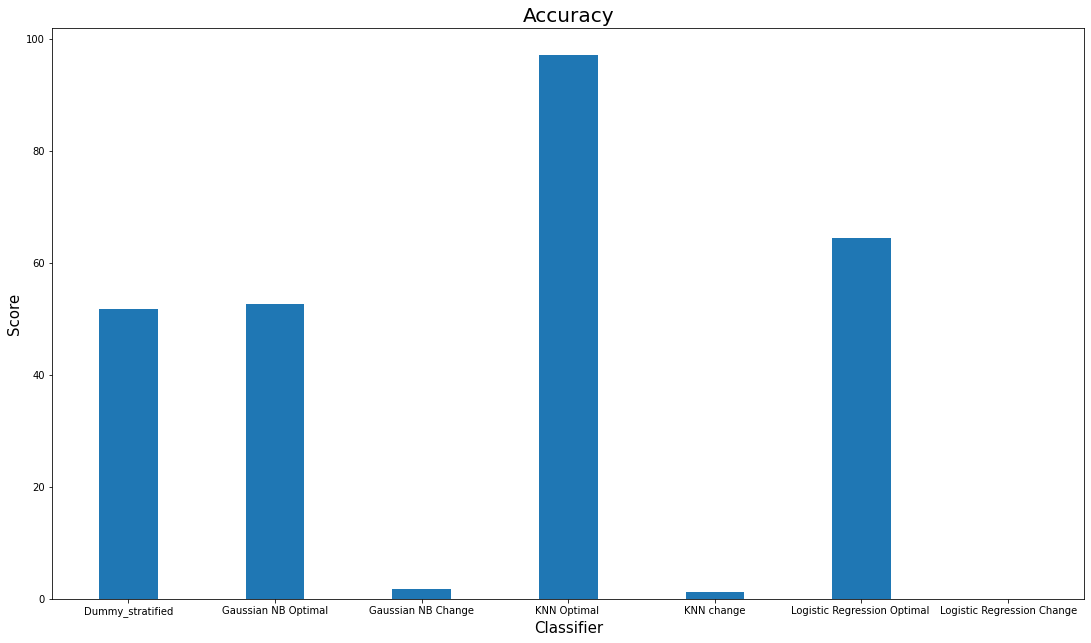

In [ ]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
x = ['Dummy_stratified','Gaussian NB Optimal','Gaussian NB Change','KNN Optimal ','KNN change','Logistic Regression Optimal ','Logistic Regression Change']
y=[100*stratified_1[2],100*gnb_optimal[2],100*(gnb_optimal[2]-GNB_1[2]),100*Knn_optimal[2],100*(Knn_optimal[2]-Knn_1[2]),100*LR_optimal[2],100*(LR_optimal[2]-LR_1[2])]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('Accuracy',fontsize= '20')
plt.xlabel('Classifier', fontsize = '15')
plt.ylabel('Score',fontsize='15')
plt.show()

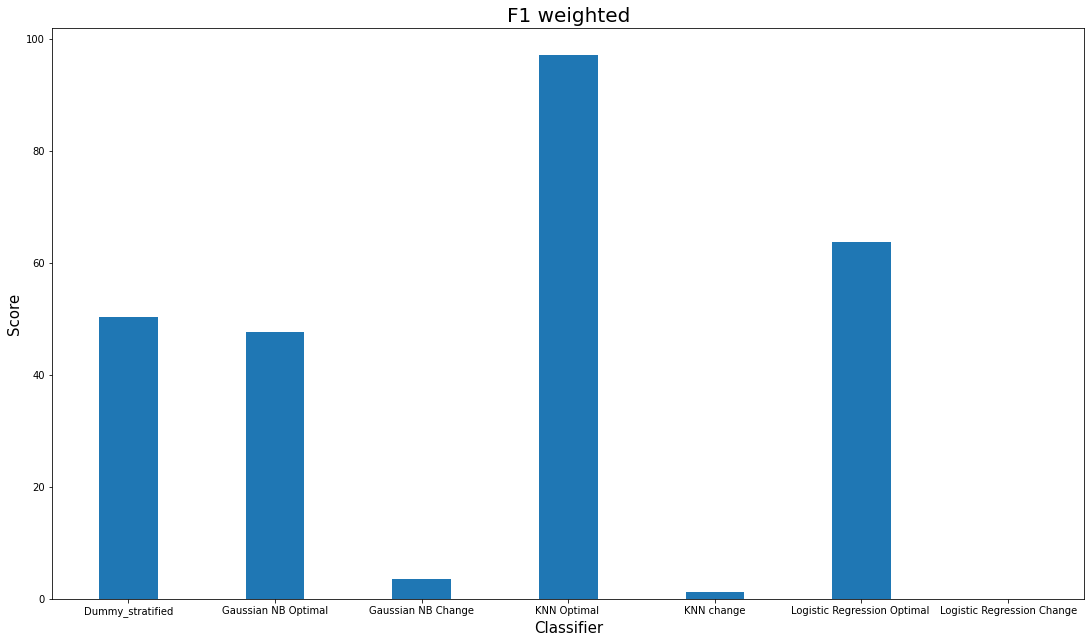

In [ ]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
x = ['Dummy_stratified','Gaussian NB Optimal','Gaussian NB Change','KNN Optimal ','KNN change','Logistic Regression Optimal ','Logistic Regression Change']
y=[100*stratified_1[1],100*gnb_optimal[1],100*(gnb_optimal[1]-GNB_1[1]),100*Knn_optimal[1],100*(Knn_optimal[1]-Knn_1[1]),100*LR_optimal[1],100*(LR_optimal[1]-LR_1[1])]
plt.bar(x,y, align='center', width=0.4)
plt.xticks(x,x)
plt.title('F1 weighted',fontsize= '20')
plt.xlabel('Classifier', fontsize = '15')
plt.ylabel('Score',fontsize='15')
plt.show()

##### Σχολιασμός




Σύγκριση επιδόσεων των διαφόρων ταξινομητών:     

* Παρατηρούμε πως ο kNN ταξινομητής εξακολουθεί να έχει αισθητά καλύτερα αποτελέσματα σε σχέση με τους υπόλοιπους ταξινομητές, καθώς και πως χρειάζεται πολύ περισσότερο χρόνο για την εκπαίδευσή του, καθώς και την διεξαγωγή προβλέψεων.  Ο λόγος που η διεξαγωγή προβλέψεων χρειάζεται περισσότερο χρόνο στον kNN ταξινομητή είναι πως για κάθε πρόβλεψη χρειάζεται να υπολογίζεται η απόσταση του σημείου από όλα τα training δείγματα. Κάτι τέτοιο είναι πολύ πιο ακριβό υπολογιστικά σε σύγκριση για παράδειγμα με τον υπολογισμό απλά της τιμής μίας discriminant συνάρτησης και την σύγκριση αυτής με το μηδέν, τα οποία εκτελεί ο Gaussian NB κατά την πρόβλεψη.
* Ο Gaussian NB ταξινομητής οδηγεί ακόκα και μετά την βελτιστοποίηση σε αντίστοιχα αποτελέσματα με τον dummy ταξινομητή, το οποίο, όπως εξηγήσαμε νωρίτερα οφείλεται στην μεγάλη απλότητα του ταξινομητή αυτού.
* Ο ταξινομητής Logistic Regression έχει μεν καλύτερες επιδόσεις από τον dummy, πολύ πιο χαμηλές όμως από τον kNN.

Σύγκριση επιδόσεων μετά την βελτιστοποίηση με τις επιδόσεις out of the box:   

* Παρατηρούμε ότι η βελτιστοποίηση δεν επέφερε σχεδόν καμία βελτίωση στις επιδόσεις. Συγκεκριμένα, η μόνη μέθοδος βελτιστοποίησης την οποία χρησιμοποιήσαμε (μετά από πειραματισμούς) είναι η επιλογή κατάλληλων υπερπαραμέτρων. Τελικά, ο LR ταξινομητής δεν βελτιώθηκε καθόλου, ενώ οι Gaussian NB και kNN σχεδόν αμελητέα.

##### Πίνακες σύγχυσης καλύτερου και χειρότερου ταξινομητή ως προς την ορθότητα

Όσον αφορά την ορθότητα ο καλύτερος ταξινομητής (εξαιρουμένων των dummy) είναι ο kNN και ο χειρότερος ο Gaussian NB. Συγκεκριμένα έχουμε τα εξής αποτελέσματα και τους εξής πίνακες σύγχυσης:

In [ ]:
t = Texttable()

accuracy = []

columns = [['Classifier','Accuracy']]
rows = ["Gaussian NB","KNN_optimal"]
classifiers_list=[gnb_optimal,Knn_optimal]
for i, clf in enumerate(classifiers_list):
  columns.append([rows[i],clf[2]])
t.add_rows(columns)
print(t.draw())


+-------------+----------+
| Classifier  | Accuracy |
+=============+==========+
| Gaussian NB | 0.527    |
+-------------+----------+
| KNN_optimal | 0.971    |
+-------------+----------+


Για τον Gaussian NB προκύπτει ο εξής πίνακας σύγχυσης:

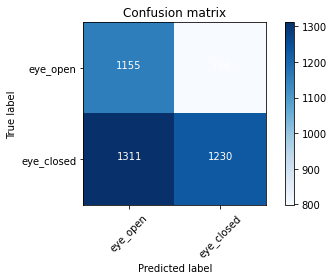

In [ ]:
best_gnb = GaussianNB(var_smoothing=0.00001)
gnb_optimal_diagrams = classification_baseline(best_gnb,X_train,X_test,y_train,y_test,True)

Για τον KNN προκύπτει ο εξής πίνακας σύγχυσης:

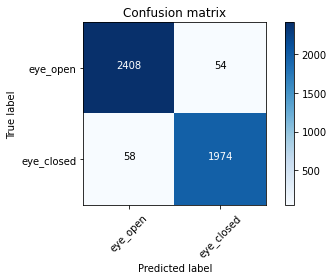

In [ ]:
best_Knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = -1)
Knn_optimal_diagrams = classification_baseline(best_Knn,X_train,X_test,y_train,y_test,True)

Από τους πίνακες σύγχυσης παρατηρούμε τα εξής:    

* O Gaussian NB προβλέπει κάνει περισσότερα σφάλματα όταν είναι κλειστό το μάτι, στην οποία περίπτωση περίπου τις μισές φορές χαρακτητρίζεται ανοιχτό και τις άλλες μισές κλειστό, όμως και στην περίπτωση ανοιχτού ματιού ο αριθμός σφαλμάτων εξακολουθεί να είναι σημαντικός (798 περιπτώσεις από τις 1953).
* Ο kNN πραγματοποιεί πολύ λίγες λανθασμένες προβλέψεις, οι οποίες είναι περίπου το ίδιο συχνές στην περίπτωση ανοιχτού και κλειστού ματιού.

#####Επιλογή ταξινομητή και αιτιολόγηση

Επιλέγοντας έναν ταξινομητή για το συγκεκριμένο πρόβλημα, θα προτείναμε τον kNN ταξινομητή. Ο λόγος για αυτό είναι πως τα ποσοστά accuracy και F1-score αυτού είναι πολύ καλύτερα σε σχέση με τους Νaive Bayes και LR. Είναι μάλιστα τόσο καλύτερα, ώστε το γεγονός πως το fit και το prediction time του kNN είναι μεγαλύτερα να μην είναι αρκετό για να αντισταθμίσει τις χειρότερες επιδόσεις των άλλων δύο ταξινομητών.

Εξηγώντας τώρα γιατί ο kNN εμφανίζει πολύ καλύτερες επιδόσεις μπορούμε να πούμε τα εξής:     

* Ο ταξινομητής kNN είναι πιο κατάλληλος από τον ταξινομητή Logistic Regression, καθώς ο KNN υποστηρίζει μη γραμμικές λύσεις.

* Ο ταξινομητής kNN είναι πιο κατάλληλος από τον Gaussian NB, καθώς ο δεύτερος υποθέτει gaussian, γνωστή κατανομή για τα δεδομένα, καθώς και ανεξαρτησία αυτών. Οι υποθέσεις αυτές είναι απλουστευτικές, και εκτός και αν γνωρίζουμε την pdf των δεδομένων μας, δεν είναι ρεαλιστικές, γεγονός που καθιστά τον Gaussian NB μη βέλτιστη επιλογή. Επιπλέον, οι ταξινομητές Naive Bayes είναι κατάλληλοι μόνο για περιπτώσεις όπου το σύνορο απόφασης έχει μορφή γραμμική, ελλειπτική ή παραβολική. Αν κάτι τέτοιο δεν ισχύει για τα δεδομένα μας, ο kNN, ο οποίος δεν απαιτεί κάτι τέτοιο για το σύνορο απόφασης είναι πιο κατάλληλος.

